In [13]:
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import math

In [14]:
# Menampilkan Sampel Data Dan Melakukan Drop Column Tertarik
df = pd.read_csv('../Dataset/kendaraan_train_pca_clean.csv')
df.sample(5)

,Component_1,Component_2,Tertarik
196698,1.295632,2.694981,0
151292,-2.192243,0.289842,0
39387,0.714729,2.391768,0
136507,1.580400,-0.705367,0
62045,3.670196,0.687965,0


In [15]:
# Mengecek Data Kosong
df.isna().sum()

Component_1    0
Component_2    0
Tertarik       0
dtype: int64

## **Feature Selection**

In [16]:
df = df[['Component_1', 'Component_2']]
df.head()

,Component_1,Component_2
0,-2.178823,0.271841
1,3.014007,0.124504
2,-2.211770,0.252479
3,2.379107,0.550604
4,-2.270448,0.208164


In [17]:
# Mengecek Total Data Pada Dataframe
print("Total Data :", len(df))

Total Data : 230631


## **K-MEANS Algorithm**

In [18]:
# Mendefinisikan Metode Euclidean Untuk Perhitungan Jarak Dari Centroid
def euclidean(x, y):
    return math.sqrt(sum((x - y)**2))


def kmeans(k, max_iter, df):
    # Inisialisasi Dictionary Centroid Kemudian Memilih Centroid Secara Random Pada Data 
    # Sesuai Banyaknya Cluster Yang Didefinisikan
    centroid = {i: df[random.randint(0, len(df))] for i in range(k)}
    print(f'Inisialisasi Centroid Random:\n{centroid} \n')

    for i in range(max_iter):
        # Mendefinisikan Dictionary Cluster Dan Mengisi Setiap Key 
        # Pada Cluster Berisi Array kosong, contoh : {0: [], 1: [], 2: []}
        cluster = {i: [] for i in range(k)}

        # Mencari Nilai Terdekat Pada Data Untuk Setiap Centroid Yang Telah Di Definisikan Sebelumnya
        # Menggunakan Metode Euclidean Dan Mencari Nilai Minimum Pada Setiap Distance 
        # Untuk Dimasukkan Kedalam Dictionary Cluster
        for x in df:
            dist = [euclidean(x, centroid[c]) for c in centroid]
            cluster[dist.index(min(dist))].append(x)

        # Mencari Nilai Centroid Ulang Dari Setiap Cluster 
        # Yang Telah Dicari Sebelumnya Menggunakan Mean 
        for cl in cluster:
            centroid[cl] = np.mean(cluster[cl], axis=0)

        print(f'Iterasi Centroid Ke-{i+1}:\n{centroid} \n')

    # Mengembalikan Nilai Dari Variabel Centroid Dan Cluster
    return centroid, cluster


## **Main Program**

In [19]:
# Merubah DataFrame Menjadi Numpy Array
data = df.to_numpy()

# Memasukkan Nilai K dan Maksimum Iterasi
k = 4
max_iter = 30

# Memanggil Fungsi kmeans Yang Akan Mengembalikan Nilai Centroid Dan Cluster
centroid, cluster = kmeans(k, max_iter, data)

Inisialisasi Centroid Random:
{0: array([1.1048045 , 0.72991846]), 1: array([0.89857408, 2.43168348]), 2: array([2.49548777, 0.02433149]), 3: array([1.36981385, 0.13418858])} 

Iterasi Centroid Ke-1:
{0: array([-1.54118741,  0.43686483]), 1: array([0.53506532, 2.08202228]), 2: array([2.51883375, 0.03644002]), 3: array([ 0.41623773, -1.19803725])} 

Iterasi Centroid Ke-2:
{0: array([-1.85508492,  0.26544786]), 1: array([0.52528342, 1.82235583]), 2: array([ 2.29969243, -0.02099079]), 3: array([ 0.33911769, -1.33322168])} 

Iterasi Centroid Ke-3:
{0: array([-1.90360349,  0.23527407]), 1: array([0.46783501, 1.71864864]), 2: array([ 2.23302729, -0.09723209]), 3: array([ 0.2378098 , -1.41609945])} 

Iterasi Centroid Ke-4:
{0: array([-1.91690548,  0.22767399]), 1: array([0.45223428, 1.68153085]), 2: array([ 2.18390122, -0.14304534]), 3: array([ 0.16559756, -1.47126085])} 

Iterasi Centroid Ke-5:
{0: array([-1.92129125,  0.22574263]), 1: array([0.45470233, 1.66835286]), 2: array([ 2.14892631, 

## **Hasil Proses Cluster Final**

In [20]:
# Inisialisasi Array Untuk Dat Cluster
df = []

# Melakukan Perulangan Untuk Setiap Key Pada Data
# Hasil Proses K-Means Untuk Diinputkan Kedalam Array Cluster (df)
for key in cluster.keys():
    for c in cluster.get(key):
        df.append((c[0], c[1], key))

# Set Array df menjadi dataframe, Menamakan nama kolom dan menampilkannya
df = pd.DataFrame(df)
df.columns = ['Component_1', 'Component_2', 'Cluster']
df.sample(10)

,Component_1,Component_2,Cluster
187229,2.965340,0.083638,2
73307,-1.843818,0.560933,0
132223,2.437056,0.009776,2
100179,0.614772,2.212766,1
41404,-2.127729,0.313207,0
101521,2.518837,1.845105,1
35686,-2.375069,0.101964,0
46990,-1.581793,0.795958,0
29210,-2.302991,0.174347,0
220942,-0.193503,-1.776695,3


In [21]:
# Menampilkan Letak Seluruh Centroids
for i in range(k):
    print(f'Centroid {i+1} :', centroid[i])

Centroid 1 : [-1.92008805  0.22744136]
Centroid 2 : [0.48540885 1.66133305]
Centroid 3 : [ 2.0511824  -0.26436605]
Centroid 4 : [-0.03489829 -1.59991636]


In [22]:
# Memetakkan Nilai X Dan Y Untuk Setiap Data Pada Dictionary Cluster
clusterize = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in cluster.items()]))

# Membuat Nama Kolom Cluster Berdasarkan Jumlah Cluster Pada Clusterize
col = []
for i in range(len(clusterize.columns)):
    col.append('Cluster ' + str(i + 1))

# Melakukan Set Nama Kolom Dan Menampilkan Sample Data Cluster
clusterize.columns = col
clusterize.sample(8)


,Cluster 1,Cluster 2,Cluster 3,Cluster 4
22631,"[-1.0119979465353068, -0.6217812008157085]","[1.157126019483086, 2.604291320437016]","[1.352226911171176, -0.8604684713209961]","[-0.6930314864087954, -2.201622573671048]"
35821,"[-2.265976007490881, 0.229325993813282]","[3.2221307740279896, 2.3430374493680763]","[1.411906018698302, -0.8277104685658521]","[0.854993167337871, -1.2866611319315038]"
63595,"[-1.8448684205262185, 0.5649709762238414]",NaN,"[2.0946226355957545, -0.2939470209963521]",NaN
84,"[-2.434829588291669, 0.082100658041981]","[0.8548873278602811, 2.378463141640702]","[0.8566511576723707, -0.4198652310907526]","[-0.2081097920060401, -1.785237369434747]"
40645,"[-2.080542562377395, 0.3618511787868074]","[1.240347829458931, 2.682394987762569]","[1.4746207669271518, -0.7712893191105696]","[0.6990613532772092, -1.3969309115960769]"
44991,"[-2.133130013596428, 0.3333308292301792]",NaN,"[1.3995873139114847, -0.7384677891798248]",NaN
29769,"[-1.9560184901345576, 0.4777201861145493]","[0.0028946493358995, 1.6778216697725263]","[0.9856556443520602, -0.2939514820412982]","[-0.4143509334446117, -1.93299189090872]"
70985,"[-2.2369781804132223, 0.2335326185577231]",NaN,NaN,NaN


## **Visualisasi Cluster**

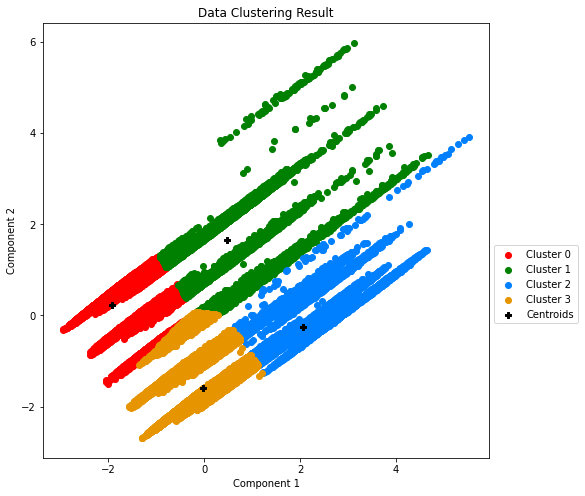

In [23]:
# Set Warna Setiap CLuster
colors = ['r', 'g', '#0080ff', '#e69500', '#e89500']

# Set Ukuran Dan Judul Plot
plt.figure(figsize=(8, 8))
plt.title('Data Clustering Result')

# Melakukan Looping Setiap Titik Data Dan Centroid
for i in range(k):
    plt.scatter(
        df['Component_1'][df['Cluster'] == i], 
        df['Component_2'][df['Cluster'] == i],
        color=colors[i],
        label=f'Cluster {i}'
    )

    plt.scatter(centroid[i][0], centroid[i][1], color='k', marker='P')

# Acuan Penampilan Label Centroid
plt.scatter(centroid[0][0], centroid[0][1], color='k', label="Centroids", marker='P')

# Set Nama Label X Dan Y Pada Plot Dan Set Tempat Legend Ditampilkan
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend(loc='best', bbox_to_anchor=(1, 0.5))
plt.show()


## **Evaluasi Model**

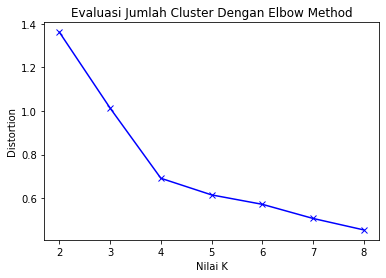

In [24]:
# Inisialisasi Array Untuk Distortion
distortions = []

# Inisialisasi Range K
K = range(2, 9)

# Melakukan Perulangan Untuk Setiap Range
for i in K:
    # Membangun Dan Fit Dataset
    model = KMeans(n_clusters=i).fit(df)
    model.fit(df)

    # Memasukkan Hasil Dari Jumlah cdist data, cluster_center Ke Array
    distortions.append(sum(np.min(cdist(df, model.cluster_centers_, 'euclidean'), axis=1)) / df.shape[0])

# Plot data
plt.plot(K, distortions, 'bx-')
plt.xlabel('Nilai K')
plt.ylabel('Distortion')
plt.title('Evaluasi Jumlah Cluster Dengan Elbow Method')
plt.show()